# Mengoptimalkan Keunggulan Bisnis dengan Analisis RFM untuk Segmentasi Loyalitas Pelanggan menggunakan K-Means

# Business Understanding

- **Objective :** Membuat segmentasi loyalitas pelanggan di US Regional Sales menggunakan algoritma K-Means berdasarkan analisis RFM untuk membantu perusahaan dalam menentukan tingkat loyalitas dan meningkatkan retensi pelanggan.

- **Problem Data Science :** Clustering

- **Machine Learning yang digunakan :** K-Means Clustering - Unsupervised
- **Dataset yang digunakan** : US Regional Sales






# Data Understanding

In [1]:
# Library untuk dataframe dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Import library untuk Clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path = '/content/drive/MyDrive/US Regional Sales.xlsx'

df_cust = pd.read_excel(path)

In [9]:
df_cust

,OrderNumber,SalesChannel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeamID,CustomerNames,CityName,Region,State,StateCode,ProductName,OrderQuantity,DiscountApplied,UnitPrice,UnitCost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,Joshua Bennett,Rochester Ltd,Babylon (Town),Northeast,New York,NY,Dining Furniture,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,Paul Holmes,Pacific Ltd,Overland Park,Midwest,Kansas,KS,Wreaths,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,Samuel Fowler,"3LAB, Ltd",Ann Arbor,Midwest,Michigan,MI,Stemware,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,Carlos Miller,"Fenwal, Corp",New Haven,West,Connecticut,CT,Accessories,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,Joe Price,Bare,Waterbury,Northeast,Connecticut,CT,Candles,8,0.100,1822.4,1476.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,2020-09-26,2020-12-30,2021-01-07,2021-01-14,USD,Joshua Ryan,Weimei Corp,San Angelo,Midwest,Texas,TX,Pendants,1,0.075,234.5,121.940
7987,SO - 0008088,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-02,2021-01-04,USD,Paul Holmes,"Apotheca, Ltd",Lafayette,Midwest,Louisiana,LA,Table Lamps,6,0.050,3202.6,1921.560
7988,SO - 0008089,Online,WARE-UHY1004,2020-09-26,2020-12-30,2021-01-23,2021-01-26,USD,Paul Holmes,OHTA'S Corp,Manchester,Midwest,New Hampshire,NH,Table Linens,5,0.200,3825.7,2792.761
7989,SO - 0008090,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-20,2021-01-25,USD,Anthony Torres,Llorens Ltd,Waterbury (Town),West,Connecticut,CT,Clocks,8,0.100,1072.0,804.000


In [10]:
df_cust.shape

(7991, 19)

In [11]:
# Menambahkan Kolom Baru Total Transaksi
df_cust['TotalTransaksi'] = df_cust['OrderQuantity'] * df_cust['UnitPrice']

In [12]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderNumber      7991 non-null   object        
 1   SalesChannel     7991 non-null   object        
 2   WarehouseCode    7991 non-null   object        
 3   ProcuredDate     7991 non-null   datetime64[ns]
 4   OrderDate        7991 non-null   datetime64[ns]
 5   ShipDate         7991 non-null   datetime64[ns]
 6   DeliveryDate     7991 non-null   datetime64[ns]
 7   CurrencyCode     7991 non-null   object        
 8   SalesTeamID      7991 non-null   object        
 9   CustomerNames    7991 non-null   object        
 10  CityName         7991 non-null   object        
 11  Region           7991 non-null   object        
 12  State            7991 non-null   object        
 13  StateCode        7991 non-null   object        
 14  ProductName      7991 non-null   object 

# Data Preparation

In [13]:
df_cust.isnull().sum()

OrderNumber        0
SalesChannel       0
WarehouseCode      0
ProcuredDate       0
OrderDate          0
ShipDate           0
DeliveryDate       0
CurrencyCode       0
SalesTeamID        0
CustomerNames      0
CityName           0
Region             0
State              0
StateCode          0
ProductName        0
OrderQuantity      0
DiscountApplied    0
UnitPrice          0
UnitCost           0
TotalTransaksi     0
dtype: int64

In [14]:
df_cust.isna().sum()

OrderNumber        0
SalesChannel       0
WarehouseCode      0
ProcuredDate       0
OrderDate          0
ShipDate           0
DeliveryDate       0
CurrencyCode       0
SalesTeamID        0
CustomerNames      0
CityName           0
Region             0
State              0
StateCode          0
ProductName        0
OrderQuantity      0
DiscountApplied    0
UnitPrice          0
UnitCost           0
TotalTransaksi     0
dtype: int64

In [15]:
df_cust.describe()

,OrderQuantity,DiscountApplied,UnitPrice,UnitCost,TotalTransaksi
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,4.525341,0.114394,2284.536504,1431.911054,10348.232587
std,2.312631,0.085570,1673.096364,1112.413043,10021.420331
min,1.000000,0.050000,167.500000,68.675000,167.500000
25%,3.000000,0.050000,1031.800000,606.115500,3195.900000
50%,5.000000,0.075000,1849.200000,1080.576000,6994.800000
75%,7.000000,0.150000,3611.300000,2040.250500,14780.200000
max,8.000000,0.400000,6566.000000,5498.556000,52313.600000


In [16]:
#define variable columns to figure out scatter of data
val = ['OrderQuantity','UnitPrice','TotalTransaksi']

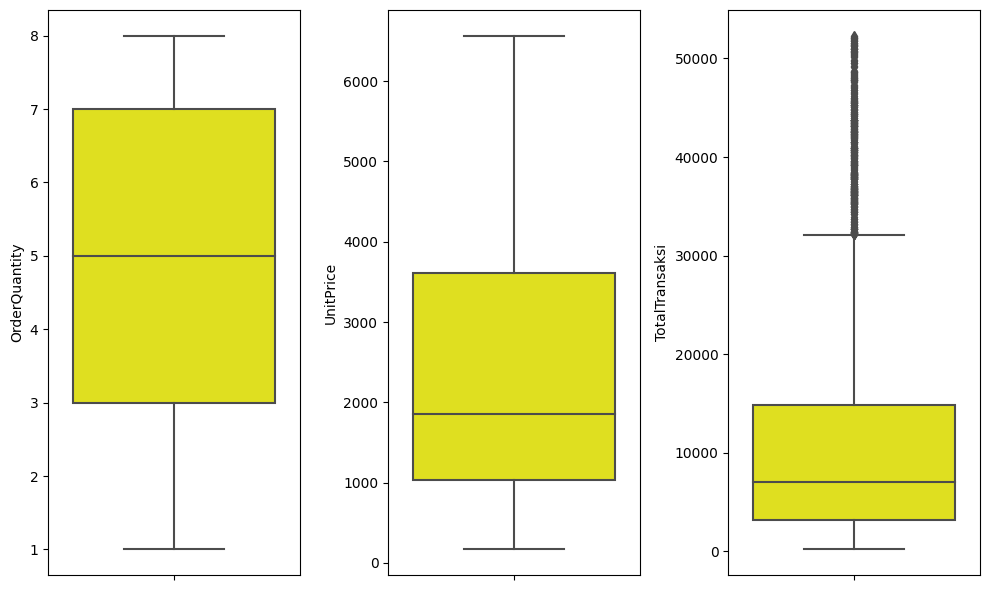

In [17]:
# adjust the figure size for better readability
plt.figure(figsize=(10,6))
# plotting
features = val
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_cust[val[i]], color='yellow')
    plt.tight_layout()

In [18]:
df_cust[df_cust['TotalTransaksi']>30000]

,OrderNumber,SalesChannel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeamID,CustomerNames,CityName,Region,State,StateCode,ProductName,OrderQuantity,DiscountApplied,UnitPrice,UnitCost,TotalTransaksi
11,SO - 000112,In-Store,WARE-NMK1003,2018-04-10,2018-06-01,2018-06-07,2018-06-17,USD,Jonathan Hawkins,Ohio,Aurora (Township),West,Illinois,IL,Rugs,5,0.150,6277.9,2762.276,31389.5
30,SO - 000131,In-Store,WARE-PUJ1005,2018-04-10,2018-06-03,2018-06-26,2018-07-05,USD,George Lewis,"Apotheca, Ltd",Murfreesboro,West,Tennessee,TN,Accessories,7,0.075,6076.9,2734.605,42538.3
31,SO - 000132,Online,WARE-PUJ1005,2017-12-31,2018-06-03,2018-06-05,2018-06-10,USD,Todd Roberts,Amylin Group,Knoxville,West,Tennessee,TN,Mirrors,7,0.200,5735.2,4186.696,40146.4
41,SO - 000142,Distributor,WARE-MKL1006,2017-12-31,2018-06-03,2018-06-24,2018-07-03,USD,Roy Rice,Burt's Corp,Milwaukee,Midwest,Wisconsin,WI,Table Lamps,8,0.050,5701.7,3249.969,45613.6
47,SO - 000148,Online,WARE-PUJ1005,2017-12-31,2018-06-04,2018-06-19,2018-06-26,USD,Shawn Wallace,Bare,Philadelphia,South,Pennsylvania,PA,Outdoor Decor,7,0.050,6452.1,5161.680,45164.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,SO - 0007941,Online,WARE-NMK1003,2020-09-26,2020-12-13,2021-01-03,2021-01-11,USD,Shawn Wallace,Rochester Ltd,Tampa,South,Florida,FL,Accessories,5,0.075,6070.2,4249.140,30351.0
7907,SO - 0008008,Distributor,WARE-XYS1001,2020-09-26,2020-12-21,2021-01-04,2021-01-14,USD,Samuel Fowler,Prasco Group,Anaheim,Midwest,California,CA,Dinnerware,5,0.200,6210.9,3540.213,31054.5
7918,SO - 0008019,In-Store,WARE-NMK1003,2020-09-26,2020-12-22,2021-01-14,2021-01-24,USD,Jerry Green,New Ltd,Boulder,West,Colorado,CO,Outdoor Furniture,5,0.100,6097.0,3353.350,30485.0
7962,SO - 0008063,Wholesale,WARE-PUJ1005,2020-09-26,2020-12-27,2021-01-05,2021-01-06,USD,Shawn Torres,ETUDE Ltd,Oyster Bay,Northeast,New York,NY,Wine Storage,8,0.075,6472.2,4983.594,51777.6


# Mencari TOP 10 yang paling banyak order

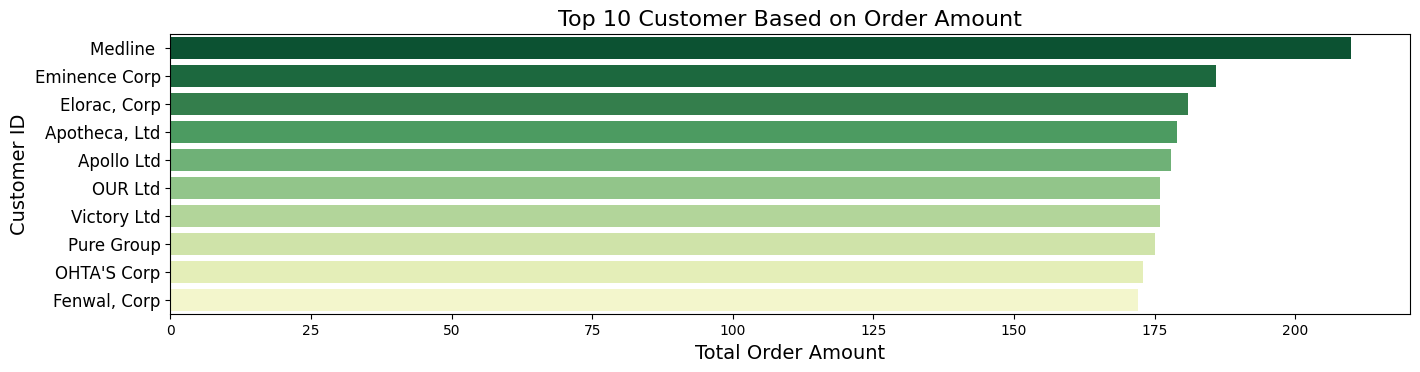

In [19]:
# Top 10 customer berdasarkan frekuensi order
top_10_customer_order = df_cust['OrderNumber'].groupby(df_cust['CustomerNames']).count().sort_values(ascending=False)[:10]

# Visualization
plt.figure(figsize=(16,8))

plt.subplot(211)
sns.barplot(y=top_10_customer_order.index, x=top_10_customer_order.values, palette='YlGn_r')
plt.title('Top 10 Customer Based on Order Amount',fontsize=16)
plt.xlabel('Total Order Amount',fontsize=14)
plt.ylabel('Customer ID',fontsize=14)
plt.yticks(fontsize=12)

plt.show()

# Data Modelling

# RFM Analysis

In [20]:
#Max time
max_time = df_cust['OrderDate'].max() + dt.timedelta(1)
max_time

Timestamp('2020-12-31 00:00:00')

In [21]:
#Groupby customer names
customer = df_cust.groupby('CustomerNames', as_index=False).agg(
    recency   =  ('OrderDate', lambda x: (max_time-x.max()).days),
    frequency =  ('OrderNumber', lambda x: x.nunique()),
    monetary  =  ('TotalTransaksi', 'sum'),
    avg_spend =  ('TotalTransaksi', 'mean'),
    most_product_buy  = ('ProductName', lambda x: x.value_counts().index[0]),
    first_transaction = ('OrderDate', 'min'),
    last_transaction  = ('OrderDate', 'max')
)

In [22]:
customer_round = customer.round(2)

In [23]:
customer_round

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction
0,21st Ltd,14,158,1763942.5,11164.19,Floor Lamps,2018-06-01,2020-12-17
1,"3LAB, Ltd",2,135,1547773.7,11464.99,Pendants,2018-05-31,2020-12-29
2,Amylin Group,9,145,1555070.0,10724.62,Rugs,2018-06-03,2020-12-22
3,Apollo Ltd,5,178,1883410.2,10580.96,Bedroom Furniture,2018-06-01,2020-12-26
4,"Apotheca, Ltd",1,179,2112221.9,11800.12,Floor Lamps,2018-06-03,2020-12-30
5,Ascend Ltd,7,150,1413988.1,9426.59,Festive,2018-06-07,2020-12-24
6,AuroMedics Corp,10,152,1622257.6,10672.75,Festive,2018-06-17,2020-12-21
7,Avon Corp,8,152,1322278.5,8699.20,Rugs,2018-06-08,2020-12-23
8,Bare,6,152,1503466.6,9891.23,Serveware,2018-05-31,2020-12-25
9,Burt's Corp,22,151,1429960.9,9469.94,Basketball,2018-06-03,2020-12-09


In [24]:
customer_round.describe()

,recency,frequency,monetary,avg_spend
count,50.000000,50.00000,5.000000e+01,50.000000
mean,6.100000,159.82000,1.653855e+06,10338.625600
std,5.395576,14.23088,2.005965e+05,704.671586
min,1.000000,135.00000,1.322278e+06,8699.200000
25%,3.000000,151.25000,1.515517e+06,9828.537500
50%,4.000000,157.50000,1.621581e+06,10376.855000
75%,8.000000,167.75000,1.816336e+06,10720.050000
max,29.000000,210.00000,2.248332e+06,12148.650000


# Cek Outlier dari RFM

## Univariate Outliers with Method IQR

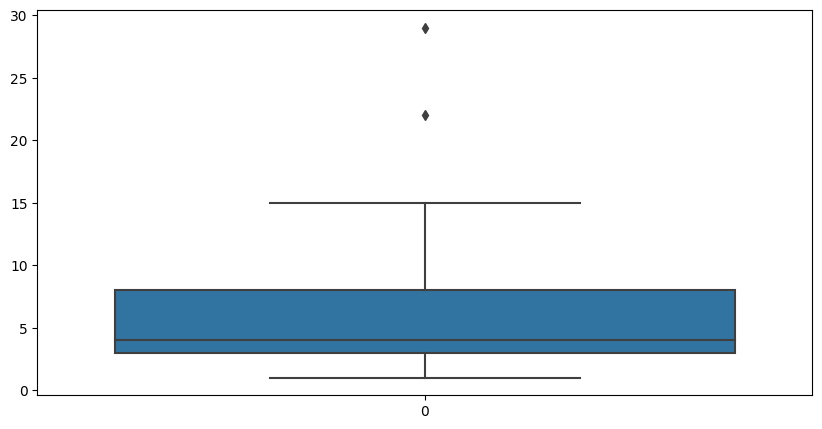

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(customer_round['recency'])
plt.annotate('Outlier', (customer_round['recency'].describe()['max'],0.1), xytext = (customer_round['recency'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = customer_round['recency'].describe()['75%'] - customer_round['recency'].describe()['25%']

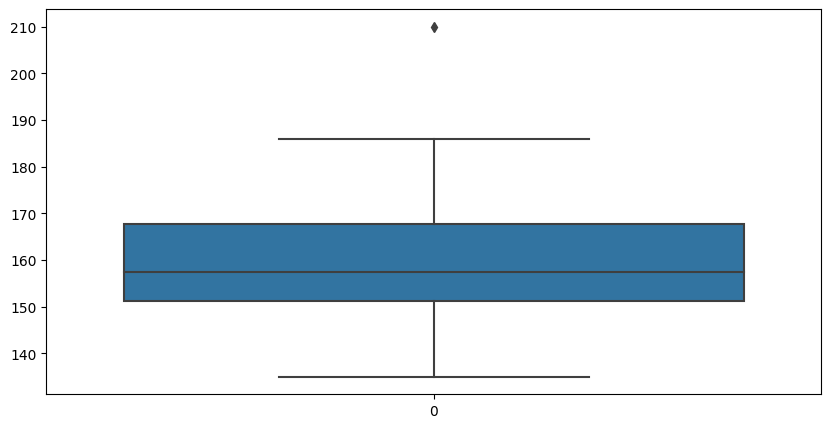

In [26]:
plt.figure(figsize = (10, 5))
sns.boxplot(customer_round['frequency'])
plt.annotate('Outlier', (customer_round['frequency'].describe()['max'],0.1), xytext = (customer_round['frequency'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = customer_round['frequency'].describe()['75%'] - customer_round['frequency'].describe()['25%']

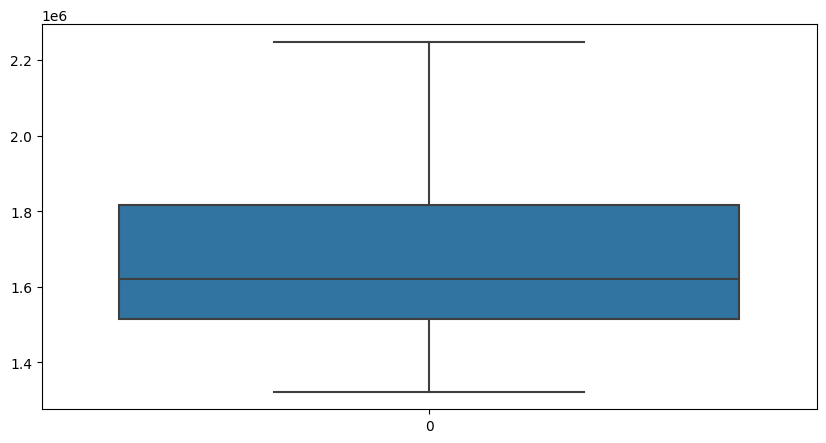

In [27]:
plt.figure(figsize = (10, 5))
sns.boxplot(customer_round['monetary'])
plt.annotate('Outlier', (customer_round['monetary'].describe()['max'],0.1), xytext = (customer_round['monetary'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = customer_round['monetary'].describe()['75%'] - customer_round['monetary'].describe()['25%']

In [28]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [29]:
recency_outlier = detect_outliers(customer_round,'recency')
frequency_outlier = detect_outliers(customer_round,'frequency')
monetary_outlier = detect_outliers(customer_round,'monetary')
recency_outlier

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction
9,Burt's Corp,22,151,1429960.9,9469.94,Basketball,2018-06-03,2020-12-09
35,Procter Corp,29,159,1609232.8,10120.96,Accessories,2018-06-01,2020-12-02


In [30]:
frequency_outlier

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction
21,Medline,2,210,2248332.4,10706.34,Accessories,2018-06-14,2020-12-29


In [31]:
monetary_outlier

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction


In [32]:
iqr_outlier = customer_round.drop(labels=[9,35,21], axis=0)
iqr_outlier

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction
0,21st Ltd,14,158,1763942.5,11164.19,Floor Lamps,2018-06-01,2020-12-17
1,"3LAB, Ltd",2,135,1547773.7,11464.99,Pendants,2018-05-31,2020-12-29
2,Amylin Group,9,145,1555070.0,10724.62,Rugs,2018-06-03,2020-12-22
3,Apollo Ltd,5,178,1883410.2,10580.96,Bedroom Furniture,2018-06-01,2020-12-26
4,"Apotheca, Ltd",1,179,2112221.9,11800.12,Floor Lamps,2018-06-03,2020-12-30
5,Ascend Ltd,7,150,1413988.1,9426.59,Festive,2018-06-07,2020-12-24
6,AuroMedics Corp,10,152,1622257.6,10672.75,Festive,2018-06-17,2020-12-21
7,Avon Corp,8,152,1322278.5,8699.20,Rugs,2018-06-08,2020-12-23
8,Bare,6,152,1503466.6,9891.23,Serveware,2018-05-31,2020-12-25
10,Capweld,3,140,1494033.0,10671.66,Festive,2018-06-02,2020-12-28


## Bivariate Analysis

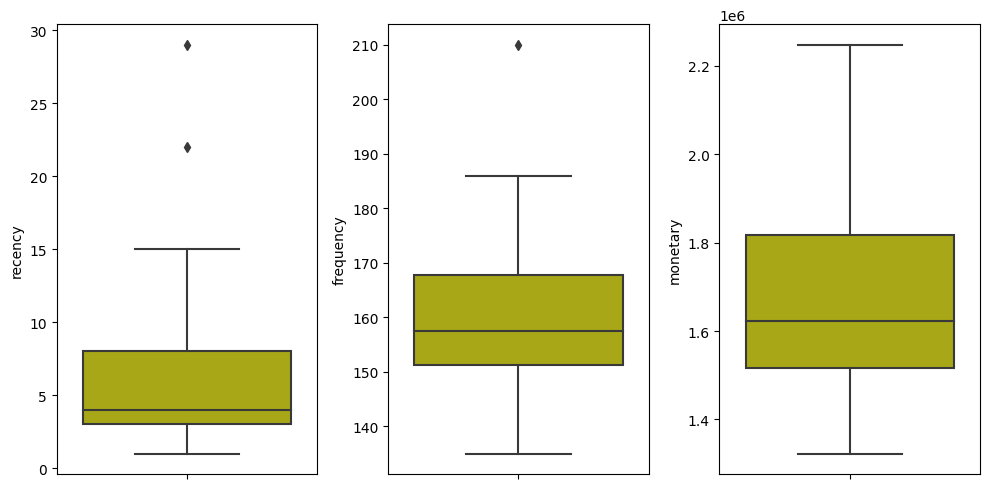

In [33]:
#boxplot for outlier check
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.boxplot(ax=axes[0],data=customer_round,y='recency', color='y')
sns.boxplot(ax=axes[1],data=customer_round,y='frequency', color='y')
sns.boxplot(ax=axes[2],data=customer_round,y='monetary', color='y')
plt.tight_layout()

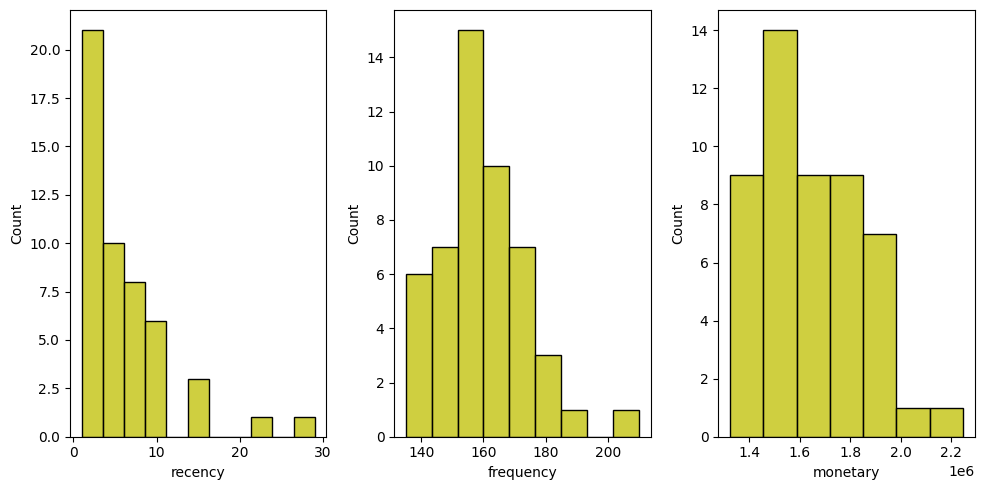

In [34]:
#boxplot for outlier check
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.histplot(ax=axes[0],data=customer_round,x='recency',color='y')
sns.histplot(ax=axes[1],data=customer_round,x='frequency',color='y')
sns.histplot(ax=axes[2],data=customer_round,x='monetary',color='y')
plt.tight_layout()

## Multivariate Analysis

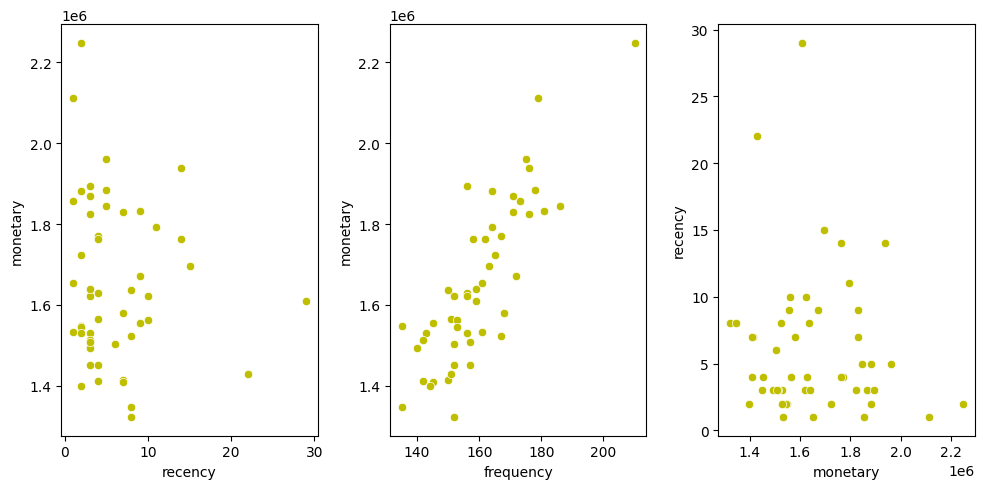

In [35]:
#visualization of scatter on rfm_df dataset
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.scatterplot(ax=axes[0],data=customer_round,x='recency', y='monetary',color='y')
sns.scatterplot(ax=axes[1],data=customer_round,x='frequency', y='monetary',color='y')
sns.scatterplot(ax=axes[2],data=customer_round,y='recency', x='monetary',color='y')
plt.tight_layout()

# Handling Outlier

In [36]:
#transformation data to reduce outlier
outlier_column = ['recency', 'frequency']
for column in outlier_column:
  customer_round[column] = np.log10(customer_round[column] + 1)

In [37]:
def check_outlier(data, column):
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3 - q1

  return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr)
                                else 'not-outlier' for x in data[column].values]


customer_round['out_rec'] = check_outlier(data=customer_round, column='recency')
customer_round['out_freq'] = check_outlier(data=customer_round, column='frequency')
customer_round['out_mon'] = check_outlier(data=customer_round, column='monetary')
customer_round

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,out_rec,out_freq,out_mon
0,21st Ltd,1.176091,2.201397,1763942.5,11164.19,Floor Lamps,2018-06-01,2020-12-17,not-outlier,not-outlier,not-outlier
1,"3LAB, Ltd",0.477121,2.133539,1547773.7,11464.99,Pendants,2018-05-31,2020-12-29,not-outlier,not-outlier,not-outlier
2,Amylin Group,1.000000,2.164353,1555070.0,10724.62,Rugs,2018-06-03,2020-12-22,not-outlier,not-outlier,not-outlier
3,Apollo Ltd,0.778151,2.252853,1883410.2,10580.96,Bedroom Furniture,2018-06-01,2020-12-26,not-outlier,not-outlier,not-outlier
4,"Apotheca, Ltd",0.301030,2.255273,2112221.9,11800.12,Floor Lamps,2018-06-03,2020-12-30,not-outlier,not-outlier,not-outlier
5,Ascend Ltd,0.903090,2.178977,1413988.1,9426.59,Festive,2018-06-07,2020-12-24,not-outlier,not-outlier,not-outlier
6,AuroMedics Corp,1.041393,2.184691,1622257.6,10672.75,Festive,2018-06-17,2020-12-21,not-outlier,not-outlier,not-outlier
7,Avon Corp,0.954243,2.184691,1322278.5,8699.20,Rugs,2018-06-08,2020-12-23,not-outlier,not-outlier,not-outlier
8,Bare,0.845098,2.184691,1503466.6,9891.23,Serveware,2018-05-31,2020-12-25,not-outlier,not-outlier,not-outlier
9,Burt's Corp,1.361728,2.181844,1429960.9,9469.94,Basketball,2018-06-03,2020-12-09,not-outlier,not-outlier,not-outlier


In [38]:
customer_round[((customer_round['out_rec']=='outlier') | (customer_round['out_freq']=='outlier') | (customer_round['out_mon']=='outlier'))]

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,out_rec,out_freq,out_mon
21,Medline,0.477121,2.324282,2248332.4,10706.34,Accessories,2018-06-14,2020-12-29,not-outlier,outlier,not-outlier


In [39]:
rfmdf = customer_round[((customer_round['out_rec']=='not-outlier') & (customer_round['out_freq']=='not-outlier') & (customer_round['out_mon']=='not-outlier'))]

In [40]:
rfmdf

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,out_rec,out_freq,out_mon
0,21st Ltd,1.176091,2.201397,1763942.5,11164.19,Floor Lamps,2018-06-01,2020-12-17,not-outlier,not-outlier,not-outlier
1,"3LAB, Ltd",0.477121,2.133539,1547773.7,11464.99,Pendants,2018-05-31,2020-12-29,not-outlier,not-outlier,not-outlier
2,Amylin Group,1.000000,2.164353,1555070.0,10724.62,Rugs,2018-06-03,2020-12-22,not-outlier,not-outlier,not-outlier
3,Apollo Ltd,0.778151,2.252853,1883410.2,10580.96,Bedroom Furniture,2018-06-01,2020-12-26,not-outlier,not-outlier,not-outlier
4,"Apotheca, Ltd",0.301030,2.255273,2112221.9,11800.12,Floor Lamps,2018-06-03,2020-12-30,not-outlier,not-outlier,not-outlier
5,Ascend Ltd,0.903090,2.178977,1413988.1,9426.59,Festive,2018-06-07,2020-12-24,not-outlier,not-outlier,not-outlier
6,AuroMedics Corp,1.041393,2.184691,1622257.6,10672.75,Festive,2018-06-17,2020-12-21,not-outlier,not-outlier,not-outlier
7,Avon Corp,0.954243,2.184691,1322278.5,8699.20,Rugs,2018-06-08,2020-12-23,not-outlier,not-outlier,not-outlier
8,Bare,0.845098,2.184691,1503466.6,9891.23,Serveware,2018-05-31,2020-12-25,not-outlier,not-outlier,not-outlier
9,Burt's Corp,1.361728,2.181844,1429960.9,9469.94,Basketball,2018-06-03,2020-12-09,not-outlier,not-outlier,not-outlier


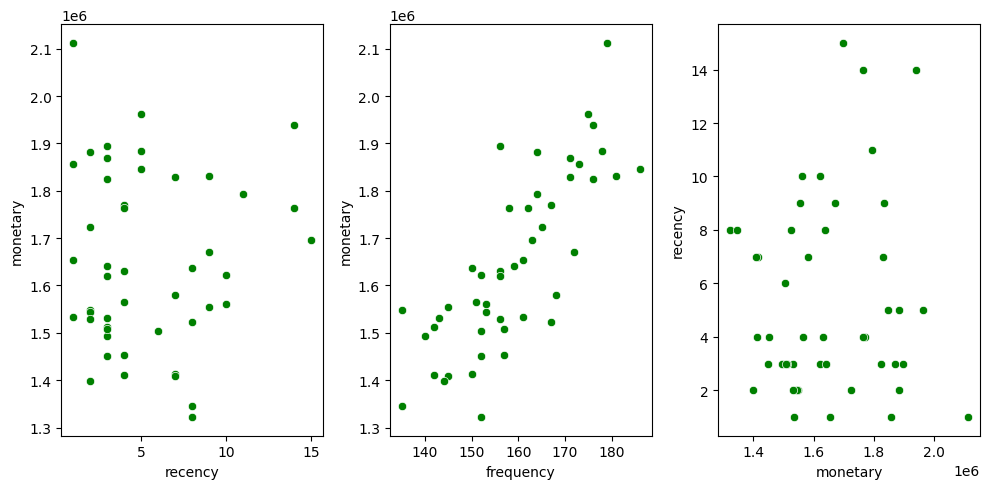

In [41]:
#visualization of scatter on rfm_df after log transformation
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.scatterplot(ax=axes[0],data=iqr_outlier,x='recency', y='monetary', color='g')
sns.scatterplot(ax=axes[1],data=iqr_outlier,x='frequency', y='monetary', color='g')
sns.scatterplot(ax=axes[2],data=iqr_outlier,y='recency', x='monetary', color='g')
plt.tight_layout()

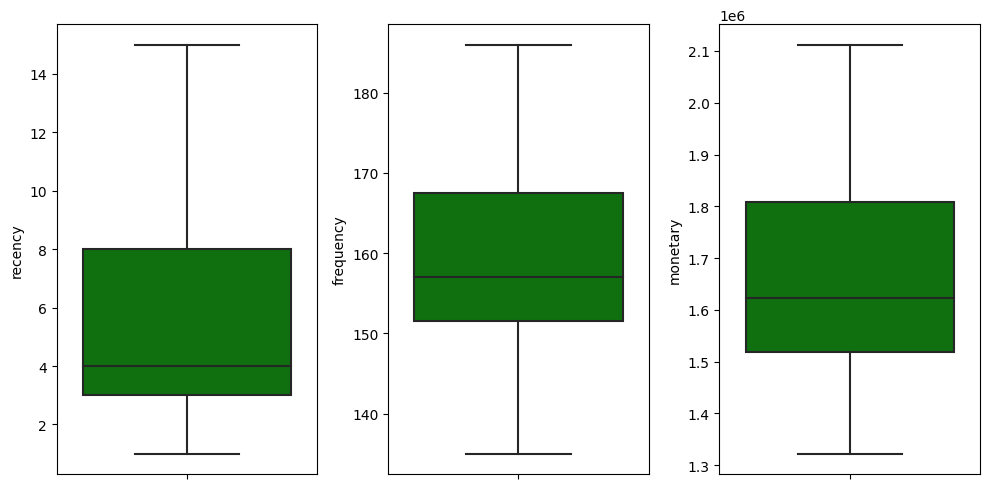

In [42]:
#boxplot after log transformation
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.boxplot(ax=axes[0],data=iqr_outlier,y='recency', color='g')
sns.boxplot(ax=axes[1],data=iqr_outlier,y='frequency', color='g')
sns.boxplot(ax=axes[2],data=iqr_outlier,y='monetary', color='g')
plt.tight_layout()

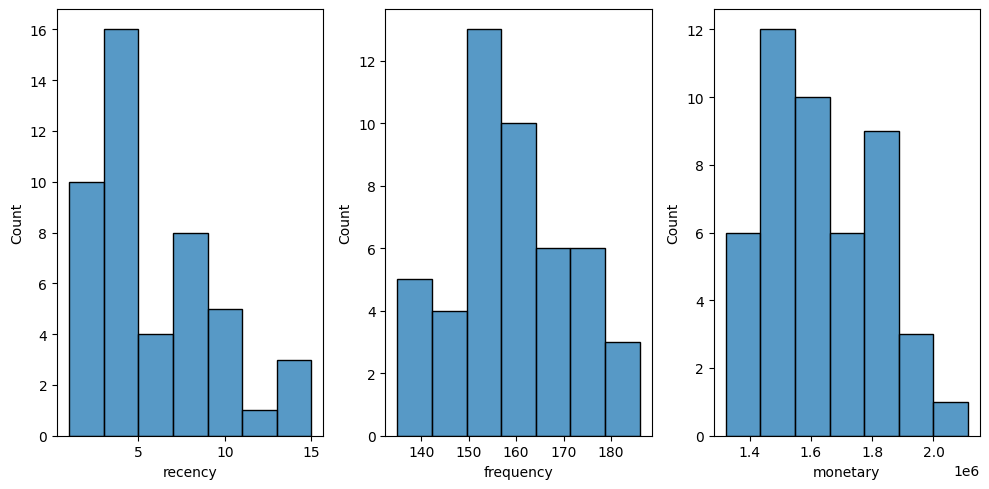

In [43]:
#boxplot for outlier check
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.histplot(ax=axes[0],data=iqr_outlier,x='recency')
sns.histplot(ax=axes[1],data=iqr_outlier,x='frequency')
sns.histplot(ax=axes[2],data=iqr_outlier,x='monetary')
plt.tight_layout()

In [44]:
customer = iqr_outlier[['CustomerNames',	'recency',	'frequency',	'monetary',	'avg_spend',	'most_product_buy',	'first_transaction',	'last_transaction']]

In [45]:
customer.head()

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction
0,21st Ltd,14,158,1763942.5,11164.19,Floor Lamps,2018-06-01,2020-12-17
1,"3LAB, Ltd",2,135,1547773.7,11464.99,Pendants,2018-05-31,2020-12-29
2,Amylin Group,9,145,1555070.0,10724.62,Rugs,2018-06-03,2020-12-22
3,Apollo Ltd,5,178,1883410.2,10580.96,Bedroom Furniture,2018-06-01,2020-12-26
4,"Apotheca, Ltd",1,179,2112221.9,11800.12,Floor Lamps,2018-06-03,2020-12-30


In [46]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 49
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerNames      47 non-null     object        
 1   recency            47 non-null     int64         
 2   frequency          47 non-null     int64         
 3   monetary           47 non-null     float64       
 4   avg_spend          47 non-null     float64       
 5   most_product_buy   47 non-null     object        
 6   first_transaction  47 non-null     datetime64[ns]
 7   last_transaction   47 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 3.3+ KB


In [47]:
#customer['recency'].describe()

In [48]:
#customer['frequency'].describe()

In [49]:
#customer_round['monetary'].describe()

#Recency Segmentation

Recency merupakan perhitungan waktu terakhir seorang customer melakukan transaksi dalam satuan hari. Segmentasi berdasarkan recency ini dilakukan dengan membuat kelompok berdasarkan nilai quartile (Q1, Q2, dan Q3) sehingga terdapat 3 kelompok. Nama dari kelompok tersebut adalah Active, Medium, Innactive.

In [50]:
# Calculate Q1, Q2, Q3 from Recency
customer['recency'].quantile([0.25, 0.5, 0.75])

0.25    3.0
0.50    4.0
0.75    8.0
Name: recency, dtype: float64

In [51]:
# Recency Segmentation using quartile and scoring
label_r = range(3, 0, -1)
group_r = pd.qcut(customer['recency'], q=3, labels=label_r).astype('int')
customer['RecencySegment'] = group_r.values

In [52]:
# Group by R
df_R = customer.groupby(['RecencySegment']).agg(n_customers=('CustomerNames', 'nunique')).reset_index(drop = False)

# Name the R segment
df_R.loc[df_R['RecencySegment'] == 3, 'R_group'] = 'Active'
df_R.loc[df_R['RecencySegment'] == 2, 'R_group'] = 'Medium'
df_R.loc[df_R['RecencySegment'] == 1, 'R_group'] = 'Innactive'

# Calculate the percentage
df_R['recency_percent'] = round(df_R['n_customers'] / df_R['n_customers'].sum() *100, 2)

In [53]:
df_R

,RecencySegment,n_customers,R_group,recency_percent
0,1,13,Innactive,27.66
1,2,14,Medium,29.79
2,3,20,Active,42.55


In [54]:
recency1 = customer[customer['RecencySegment'] == 1]
recency1.sort_values(by='recency')

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,RecencySegment
7,Avon Corp,8,152,1322278.5,8699.20,Rugs,2018-06-08,2020-12-23,1
33,Pacific Ltd,8,167,1523888.2,9125.08,Dinnerware,2018-05-31,2020-12-23,1
40,Select,8,150,1636897.1,10912.65,Phones,2018-06-02,2020-12-23,1
46,WakeFern,8,135,1346264.5,9972.33,TV and video,2018-06-03,2020-12-23,1
2,Amylin Group,9,145,1555070.0,10724.62,Rugs,2018-06-03,2020-12-22,1
15,"Elorac, Corp",9,181,1831947.5,10121.26,Ornaments,2018-06-04,2020-12-22,1
18,"Fenwal, Corp",9,172,1670109.0,9709.94,Candleholders,2018-05-31,2020-12-22,1
6,AuroMedics Corp,10,152,1622257.6,10672.75,Festive,2018-06-17,2020-12-21,1
23,Mylan Corp,10,153,1561783.4,10207.73,Furniture Cushions,2018-06-03,2020-12-21,1
12,E. Ltd,11,164,1793523.0,10936.12,Wall Frames,2018-06-01,2020-12-20,1


In [55]:
recency2 = customer[customer['RecencySegment'] == 2]
recency2.sort_values(by='recency')

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,RecencySegment
13,ETUDE Ltd,4,167,1770582.2,10602.29,Furniture Cushions,2018-06-05,2020-12-27,2
17,"Exact-Rx, Corp",4,151,1564275.8,10359.44,Floor Lamps,2018-06-17,2020-12-27,2
19,Linde,4,157,1452225.0,9249.84,Dinnerware,2018-05-31,2020-12-27,2
22,Medsep Group,4,142,1411522.5,9940.30,Table Lamps,2018-06-05,2020-12-27,2
26,Nipro,4,156,1630029.6,10448.91,Wall Coverings,2018-06-19,2020-12-27,2
34,Prasco Group,4,162,1762783.4,10881.38,Furniture Cushions,2018-06-05,2020-12-27,2
3,Apollo Ltd,5,178,1883410.2,10580.96,Bedroom Furniture,2018-06-01,2020-12-26,2
16,Eminence Corp,5,186,1845783.0,9923.56,Outdoor Furniture,2018-06-04,2020-12-26,2
36,Pure Group,5,175,1962014.6,11211.51,Mirrors,2018-06-01,2020-12-26,2
8,Bare,6,152,1503466.6,9891.23,Serveware,2018-05-31,2020-12-25,2


In [56]:
recency3 = customer[customer['RecencySegment'] == 3]
recency3.sort_values(by='recency')

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,RecencySegment
4,"Apotheca, Ltd",1,179,2112221.9,11800.12,Floor Lamps,2018-06-03,2020-12-30,3
47,Weimei Corp,1,161,1533047.1,9522.03,Basketball,2018-06-18,2020-12-30,3
20,Llorens Ltd,1,161,1653814.6,10272.14,Collectibles,2018-06-03,2020-12-30,3
28,OHTA'S Corp,1,173,1856355.6,10730.38,Outdoor Decor,2018-06-01,2020-12-30,3
1,"3LAB, Ltd",2,135,1547773.7,11464.99,Pendants,2018-05-31,2020-12-29,3
37,Qualitest,2,165,1723534.8,10445.67,Cocktail Glasses,2018-06-02,2020-12-29,3
48,Winthrop,2,156,1529991.9,9807.64,Accessories,2018-06-12,2020-12-29,3
49,Wuxi Group,2,144,1398008.6,9708.39,Cocktail Glasses,2018-06-09,2020-12-29,3
24,New Ltd,2,153,1544061.9,10091.91,Serveware,2018-06-08,2020-12-29,3
30,Ohio,2,164,1881628.0,11473.34,Table Linens,2018-05-31,2020-12-29,3


**Keterangan :**

Segment 1 (Innactive) = 8 - 29 Days

Segment 2 (Medium) = 4 - 7 Days

Segment 3 (Active) = 1 - 3 Days

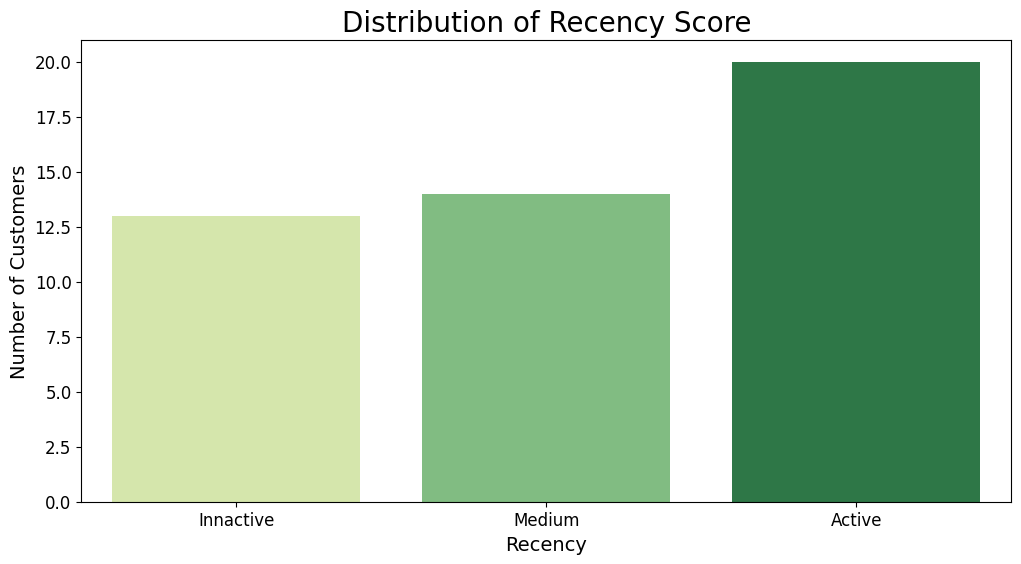

In [57]:
# Distribution of Recency
plt.figure(figsize=(12, 6))
sns.barplot(x='R_group', y='n_customers', data=df_R, palette='YlGn')
plt.title('Distribution of Recency Score',fontsize=20)
plt.xlabel('Recency',fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Frequency Segmentation

Frequency = Jumlah Transaksi

Berapa kali pelanggan berinteraksi dengan produk atau melakukan transaksi dalam periode waktu tertentu.

In [58]:
# Calculate Q1, Q2, Q3 from frequency
customer['frequency'].quantile([0.25, 0.5, 0.75])

0.25    151.5
0.50    157.0
0.75    167.5
Name: frequency, dtype: float64

In [59]:
# Frequency Segmentation using quartile and scoring
label_f = range(3, 0, -1)
group_f = pd.qcut(customer['frequency'], q=3, labels=label_f).astype('int')
customer['FrequencySegment'] = group_f.values

In [60]:
# Group by F
df_F = customer.groupby(['FrequencySegment']).agg(n_customers=('CustomerNames', 'nunique')).reset_index(drop = False)

# Name the F segment
df_F.loc[df_F['FrequencySegment'] == 1, 'F_group'] = 'Platinum'
df_F.loc[df_F['FrequencySegment'] == 2, 'F_group'] = 'Gold'
df_F.loc[df_F['FrequencySegment'] == 3, 'F_group'] = 'Silver'

# Calculate the percentage
df_F['frequency_percent'] = round(df_F['n_customers'] / df_F['n_customers'].sum() *100, 2)

In [61]:
df_F

,FrequencySegment,n_customers,F_group,frequency_percent
0,1,15,Platinum,31.91
1,2,16,Gold,34.04
2,3,16,Silver,34.04


In [62]:
frequency1 = customer[customer['FrequencySegment'] == 1]
frequency1.sort_values(by='frequency')

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,RecencySegment,FrequencySegment
37,Qualitest,2,165,1723534.8,10445.67,Cocktail Glasses,2018-06-02,2020-12-29,3,1
13,ETUDE Ltd,4,167,1770582.2,10602.29,Furniture Cushions,2018-06-05,2020-12-27,2,1
33,Pacific Ltd,8,167,1523888.2,9125.08,Dinnerware,2018-05-31,2020-12-23,1,1
25,Niconovum Corp,7,168,1579625.5,9402.53,Cookware,2018-06-06,2020-12-24,2,1
14,Ei,7,171,1830038.0,10701.98,Sculptures,2018-05-31,2020-12-24,2,1
31,Ole Group,3,171,1868321.8,10925.86,Platters,2018-06-04,2020-12-28,3,1
18,"Fenwal, Corp",9,172,1670109.0,9709.94,Candleholders,2018-05-31,2020-12-22,1,1
28,OHTA'S Corp,1,173,1856355.6,10730.38,Outdoor Decor,2018-06-01,2020-12-30,3,1
36,Pure Group,5,175,1962014.6,11211.51,Mirrors,2018-06-01,2020-12-26,2,1
29,OUR Ltd,14,176,1937827.6,11010.38,Festive,2018-06-03,2020-12-17,1,1


In [63]:
frequency2 = customer[customer['FrequencySegment'] == 2]
frequency2.sort_values(by='frequency')

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,RecencySegment,FrequencySegment
23,Mylan Corp,10,153,1561783.4,10207.73,Furniture Cushions,2018-06-03,2020-12-21,1,2
24,New Ltd,2,153,1544061.9,10091.91,Serveware,2018-06-08,2020-12-29,3,2
26,Nipro,4,156,1630029.6,10448.91,Wall Coverings,2018-06-19,2020-12-27,2,2
27,O.E. Ltd,3,156,1620904.2,10390.41,Phones,2018-06-01,2020-12-28,3,2
42,Trigen,3,156,1895188.8,12148.65,Collectibles,2018-06-01,2020-12-28,3,2
48,Winthrop,2,156,1529991.9,9807.64,Accessories,2018-06-12,2020-12-29,3,2
19,Linde,4,157,1452225.0,9249.84,Dinnerware,2018-05-31,2020-12-27,2,2
43,U.S. Ltd,3,157,1508082.9,9605.62,Home Fragrances,2018-06-01,2020-12-28,3,2
0,21st Ltd,14,158,1763942.5,11164.19,Floor Lamps,2018-06-01,2020-12-17,1,2
39,S.S.S. Group,3,159,1640367.7,10316.78,Pendants,2018-06-01,2020-12-28,3,2


In [64]:
frequency3 = customer[customer['FrequencySegment'] == 3]
frequency3.sort_values(by='frequency')

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,RecencySegment,FrequencySegment
1,"3LAB, Ltd",2,135,1547773.7,11464.99,Pendants,2018-05-31,2020-12-29,3,3
46,WakeFern,8,135,1346264.5,9972.33,TV and video,2018-06-03,2020-12-23,1,3
10,Capweld,3,140,1494033.0,10671.66,Festive,2018-06-02,2020-12-28,3,3
22,Medsep Group,4,142,1411522.5,9940.30,Table Lamps,2018-06-05,2020-12-27,2,3
38,Rochester Ltd,3,142,1512726.0,10653.00,Mirrors,2018-05-31,2020-12-28,3,3
32,"PEDIFIX, Corp",3,143,1530755.7,10704.59,Cocktail Glasses,2018-06-07,2020-12-28,3,3
49,Wuxi Group,2,144,1398008.6,9708.39,Cocktail Glasses,2018-06-09,2020-12-29,3,3
2,Amylin Group,9,145,1555070.0,10724.62,Rugs,2018-06-03,2020-12-22,1,3
11,Dharma Ltd,7,145,1408621.4,9714.63,Serveware,2018-06-03,2020-12-24,2,3
5,Ascend Ltd,7,150,1413988.1,9426.59,Festive,2018-06-07,2020-12-24,2,3


**Keterangan :**

Segment 1 (Platinum) = 165 - 210 kali pembelian

Segment 2 (Gold) = 153 - 164 kali pembelian

Segment 3 (Silver) = 135 - 152 kali pembelian

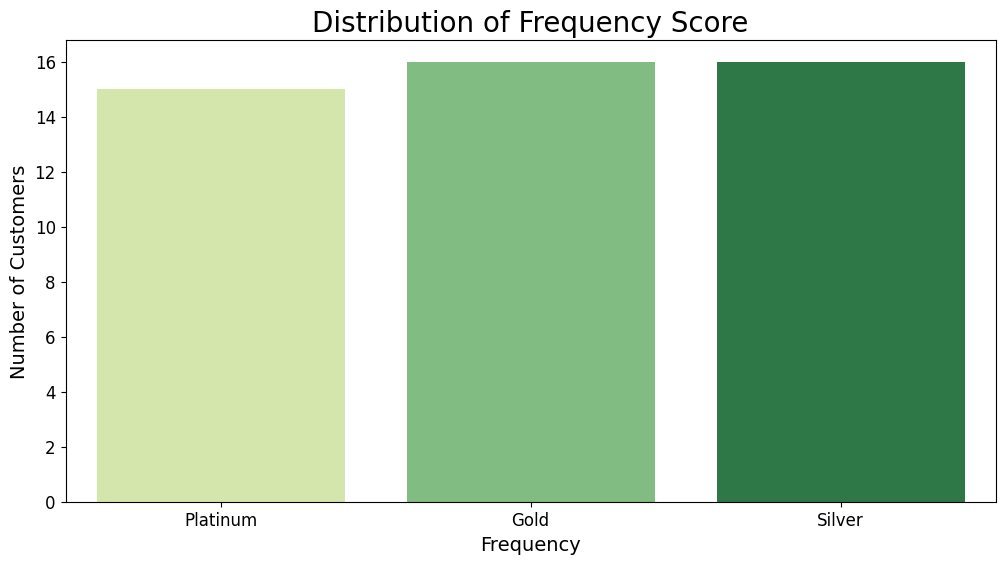

In [65]:
# Distribution of Frquency
plt.figure(figsize=(12, 6))
sns.barplot(x='F_group', y='n_customers', data=df_F, palette='YlGn')
plt.title('Distribution of Frequency Score',fontsize=20)
plt.xlabel('Frequency',fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Monetary Segmentation

Monetary = Jumlah total yang dihabiskan oleh pelanggan untuk membeli produk dalam periode waktu tertentu.

Penting karena ada kecenderungan bahwa pelanggan yang sudah membelanjakan uangnya dalam jumlah besar akan membelanjakan lebih banyak lagi di masa mendatang.

In [66]:
# Calculate Q1, Q2, Q3 from Monetary
round(customer['monetary'].quantile([0.25, 0.5, 0.75]))

0.25    1518307.0
0.50    1622258.0
0.75    1808732.0
Name: monetary, dtype: float64

In [67]:
# Scoring for M values
labels_m = range(1, 4)
group_m = pd.qcut(customer['monetary'], q = 3, labels = labels_m).astype('int')
customer['MonetarySegment'] = group_m.values

In [68]:
# Group by M
df_M = customer.groupby(['MonetarySegment']).agg(n_customers=('CustomerNames', 'nunique')).reset_index(drop = False)

# Name the M Segmentation
df_M.loc[df_M['MonetarySegment'] == 1, 'M_group'] = 'Special Values'
df_M.loc[df_M['MonetarySegment'] == 2, 'M_group'] = 'Medium Values'
df_M.loc[df_M['MonetarySegment'] == 3, 'M_group'] = 'Low Values'

# Calculate the percentage
df_M['monetary_percent'] = round(df_M['n_customers'] / df_M['n_customers'].sum() *100, 2)

df_M

,MonetarySegment,n_customers,M_group,monetary_percent
0,1,16,Special Values,34.04
1,2,15,Medium Values,31.91
2,3,16,Low Values,34.04


In [69]:
monetary1 = customer[customer['MonetarySegment'] == 1]
monetary1.sort_values(by='monetary')

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,RecencySegment,FrequencySegment,MonetarySegment
7,Avon Corp,8,152,1322278.5,8699.20,Rugs,2018-06-08,2020-12-23,1,3,1
46,WakeFern,8,135,1346264.5,9972.33,TV and video,2018-06-03,2020-12-23,1,3,1
49,Wuxi Group,2,144,1398008.6,9708.39,Cocktail Glasses,2018-06-09,2020-12-29,3,3,1
11,Dharma Ltd,7,145,1408621.4,9714.63,Serveware,2018-06-03,2020-12-24,2,3,1
22,Medsep Group,4,142,1411522.5,9940.30,Table Lamps,2018-06-05,2020-12-27,2,3,1
5,Ascend Ltd,7,150,1413988.1,9426.59,Festive,2018-06-07,2020-12-24,2,3,1
44,Uriel Group,3,152,1450060.9,9539.87,Wreaths,2018-06-18,2020-12-28,3,3,1
19,Linde,4,157,1452225.0,9249.84,Dinnerware,2018-05-31,2020-12-27,2,2,1
10,Capweld,3,140,1494033.0,10671.66,Festive,2018-06-02,2020-12-28,3,3,1
8,Bare,6,152,1503466.6,9891.23,Serveware,2018-05-31,2020-12-25,2,3,1


In [70]:
monetary2 = customer[customer['MonetarySegment'] == 2]
monetary2.sort_values(by='monetary')

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,RecencySegment,FrequencySegment,MonetarySegment
24,New Ltd,2,153,1544061.9,10091.91,Serveware,2018-06-08,2020-12-29,3,2,2
1,"3LAB, Ltd",2,135,1547773.7,11464.99,Pendants,2018-05-31,2020-12-29,3,3,2
2,Amylin Group,9,145,1555070.0,10724.62,Rugs,2018-06-03,2020-12-22,1,3,2
23,Mylan Corp,10,153,1561783.4,10207.73,Furniture Cushions,2018-06-03,2020-12-21,1,2,2
17,"Exact-Rx, Corp",4,151,1564275.8,10359.44,Floor Lamps,2018-06-17,2020-12-27,2,3,2
25,Niconovum Corp,7,168,1579625.5,9402.53,Cookware,2018-06-06,2020-12-24,2,1,2
27,O.E. Ltd,3,156,1620904.2,10390.41,Phones,2018-06-01,2020-12-28,3,2,2
6,AuroMedics Corp,10,152,1622257.6,10672.75,Festive,2018-06-17,2020-12-21,1,3,2
26,Nipro,4,156,1630029.6,10448.91,Wall Coverings,2018-06-19,2020-12-27,2,2,2
40,Select,8,150,1636897.1,10912.65,Phones,2018-06-02,2020-12-23,1,3,2


In [71]:
monetary3 = customer[customer['MonetarySegment'] == 3]
monetary3.sort_values(by='monetary')

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,RecencySegment,FrequencySegment,MonetarySegment
34,Prasco Group,4,162,1762783.4,10881.38,Furniture Cushions,2018-06-05,2020-12-27,2,2,3
0,21st Ltd,14,158,1763942.5,11164.19,Floor Lamps,2018-06-01,2020-12-17,1,2,3
13,ETUDE Ltd,4,167,1770582.2,10602.29,Furniture Cushions,2018-06-05,2020-12-27,2,1,3
12,E. Ltd,11,164,1793523.0,10936.12,Wall Frames,2018-06-01,2020-12-20,1,2,3
45,Victory Ltd,3,176,1823941.0,10363.30,Wreaths,2018-07-04,2020-12-28,3,1,3
14,Ei,7,171,1830038.0,10701.98,Sculptures,2018-05-31,2020-12-24,2,1,3
15,"Elorac, Corp",9,181,1831947.5,10121.26,Ornaments,2018-06-04,2020-12-22,1,1,3
16,Eminence Corp,5,186,1845783.0,9923.56,Outdoor Furniture,2018-06-04,2020-12-26,2,1,3
28,OHTA'S Corp,1,173,1856355.6,10730.38,Outdoor Decor,2018-06-01,2020-12-30,3,1,3
31,Ole Group,3,171,1868321.8,10925.86,Platters,2018-06-04,2020-12-28,3,1,3


**Keterangan:**

Segment 1 ( Special Values) = 1.762.783 - 2.248.332

Segment 2 (Medium Values) = 1.544.061 - 1.723.534

Segment 3 (Low Values) = 1.322.278 - 1.533.047

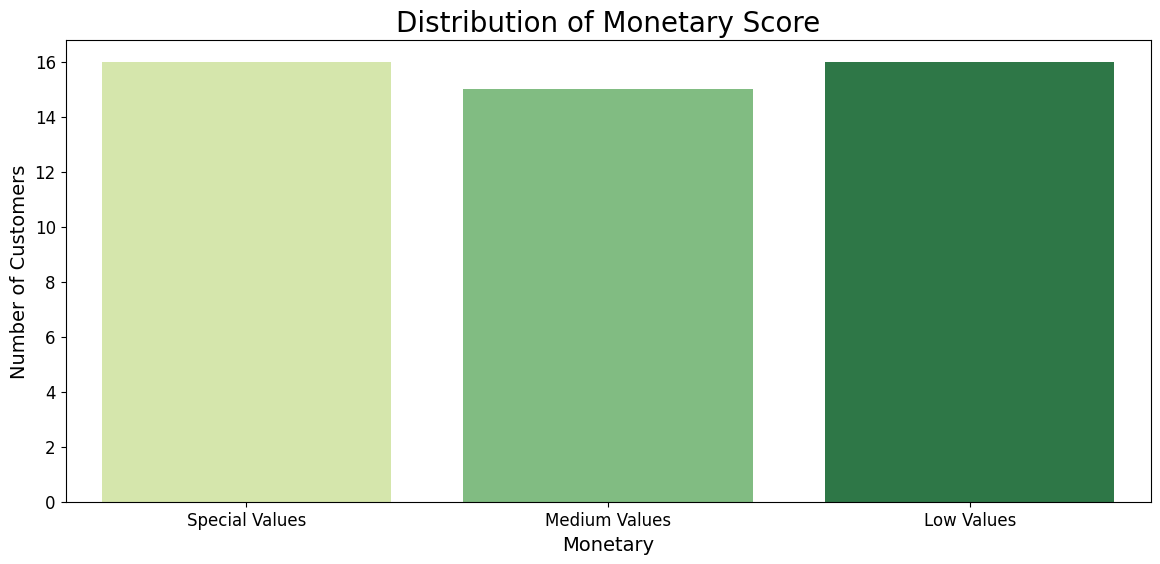

In [72]:
# Distribution of Monetary
plt.figure(figsize=(14, 6))
sns.barplot(x='M_group', y='n_customers', data=df_M, palette='YlGn')
plt.title('Distribution of Monetary Score',fontsize=20)
plt.xlabel('Monetary',fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# K-Means

In [73]:
from sklearn.cluster import KMeans

# From sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [74]:
# Menentukan Input Variable

x = customer[['recency',	'frequency', 'monetary']]

# Karena pemodelan unsupervised learning maka tidak ada variable target

In [75]:
x

,recency,frequency,monetary
0,14,158,1763942.5
1,2,135,1547773.7
2,9,145,1555070.0
3,5,178,1883410.2
4,1,179,2112221.9
5,7,150,1413988.1
6,10,152,1622257.6
7,8,152,1322278.5
8,6,152,1503466.6
10,3,140,1494033.0


# Evaluation

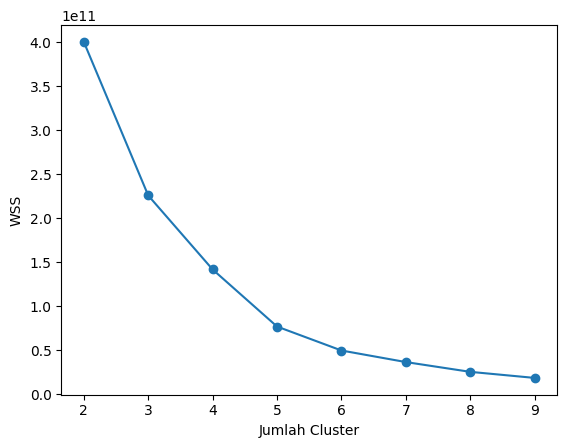

In [76]:
cluster_range = range(2,10)

cluster_wss = []
# Semakin jarak antar grup nya lebar semakin bagus

for num_cluster in cluster_range:
  clusters = KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker='o')

plt.show()

In [77]:
for i, wss in enumerate(cluster_wss):
    print(f"Jumlah Cluster: {i+2}, Cluster WSS: {wss:.2f}")

Jumlah Cluster: 2, Cluster WSS: 400445135022.65
Jumlah Cluster: 3, Cluster WSS: 225751470986.66
Jumlah Cluster: 4, Cluster WSS: 141576150532.63
Jumlah Cluster: 5, Cluster WSS: 76664216390.67
Jumlah Cluster: 6, Cluster WSS: 49422116572.78
Jumlah Cluster: 7, Cluster WSS: 36265613780.68
Jumlah Cluster: 8, Cluster WSS: 25139674715.81
Jumlah Cluster: 9, Cluster WSS: 18242943871.25


###Evaluation Metrics

In [78]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:

    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6462624333979045
For n_clusters=3, the silhouette score is 0.5943152271304657
For n_clusters=4, the silhouette score is 0.58107911899009
For n_clusters=5, the silhouette score is 0.6024841364770452
For n_clusters=6, the silhouette score is 0.5792923588319431
For n_clusters=7, the silhouette score is 0.6140317448924763
For n_clusters=8, the silhouette score is 0.6197617746215645
For n_clusters=9, the silhouette score is 0.5810654511475168
For n_clusters=10, the silhouette score is 0.5765600046628251


In [79]:
# Scale
#scaler = StandardScaler()

# Data Scale
#x_scaled = scaler.fit_transform(x)

In [80]:
#x_scaled

Menggunakan Standard Scaled untuk meningkatkan model algoritma K-Means menghasilkan cluster yang terbaik.

# Deployment

In [81]:
# Menentukan konfigurasi K-Means pada model
cls = KMeans(n_clusters = 3, random_state=0)

# Membentuk model
model_cls = cls.fit(x)

In [82]:
customer['Cluster'] = model_cls.labels_
customer

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,RecencySegment,FrequencySegment,MonetarySegment,Cluster
0,21st Ltd,14,158,1763942.5,11164.19,Floor Lamps,2018-06-01,2020-12-17,1,2,3,0
1,"3LAB, Ltd",2,135,1547773.7,11464.99,Pendants,2018-05-31,2020-12-29,3,3,2,1
2,Amylin Group,9,145,1555070.0,10724.62,Rugs,2018-06-03,2020-12-22,1,3,2,1
3,Apollo Ltd,5,178,1883410.2,10580.96,Bedroom Furniture,2018-06-01,2020-12-26,2,1,3,0
4,"Apotheca, Ltd",1,179,2112221.9,11800.12,Floor Lamps,2018-06-03,2020-12-30,3,1,3,0
5,Ascend Ltd,7,150,1413988.1,9426.59,Festive,2018-06-07,2020-12-24,2,3,1,2
6,AuroMedics Corp,10,152,1622257.6,10672.75,Festive,2018-06-17,2020-12-21,1,3,2,1
7,Avon Corp,8,152,1322278.5,8699.20,Rugs,2018-06-08,2020-12-23,1,3,1,2
8,Bare,6,152,1503466.6,9891.23,Serveware,2018-05-31,2020-12-25,2,3,1,1
10,Capweld,3,140,1494033.0,10671.66,Festive,2018-06-02,2020-12-28,3,3,1,1


## Hasil dari Cluster menunjukan:

Cluster 0 = Middle Customers

Cluster 1 = High Customer

Cluster 2 = Low Customers



In [83]:
cluster0 = customer[customer['Cluster'] == 0]
cluster0.sort_values(by='CustomerNames')

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,RecencySegment,FrequencySegment,MonetarySegment,Cluster
0,21st Ltd,14,158,1763942.5,11164.19,Floor Lamps,2018-06-01,2020-12-17,1,2,3,0
3,Apollo Ltd,5,178,1883410.2,10580.96,Bedroom Furniture,2018-06-01,2020-12-26,2,1,3,0
4,"Apotheca, Ltd",1,179,2112221.9,11800.12,Floor Lamps,2018-06-03,2020-12-30,3,1,3,0
12,E. Ltd,11,164,1793523.0,10936.12,Wall Frames,2018-06-01,2020-12-20,1,2,3,0
13,ETUDE Ltd,4,167,1770582.2,10602.29,Furniture Cushions,2018-06-05,2020-12-27,2,1,3,0
14,Ei,7,171,1830038.0,10701.98,Sculptures,2018-05-31,2020-12-24,2,1,3,0
15,"Elorac, Corp",9,181,1831947.5,10121.26,Ornaments,2018-06-04,2020-12-22,1,1,3,0
16,Eminence Corp,5,186,1845783.0,9923.56,Outdoor Furniture,2018-06-04,2020-12-26,2,1,3,0
28,OHTA'S Corp,1,173,1856355.6,10730.38,Outdoor Decor,2018-06-01,2020-12-30,3,1,3,0
29,OUR Ltd,14,176,1937827.6,11010.38,Festive,2018-06-03,2020-12-17,1,1,3,0


**Hasil Analisa Cluster 0 (Middle Customers) :**

- Recency Segment kebanyakan berada di segment 3 yaitu Active

- Frequency Segment kebanyakan berada di segment 2 yaitu Gold

- Monetary Segment kebanyakan berada di segment 2 yaitu Medium Values

In [84]:
cluster1 = customer[customer['Cluster'] == 1]
cluster1.sort_values(by='RecencySegment')

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,RecencySegment,FrequencySegment,MonetarySegment,Cluster
2,Amylin Group,9,145,1555070.0,10724.62,Rugs,2018-06-03,2020-12-22,1,3,2,1
6,AuroMedics Corp,10,152,1622257.6,10672.75,Festive,2018-06-17,2020-12-21,1,3,2,1
18,"Fenwal, Corp",9,172,1670109.0,9709.94,Candleholders,2018-05-31,2020-12-22,1,1,2,1
41,Sundial,15,163,1696225.6,10406.29,Platters,2018-06-16,2020-12-16,1,2,2,1
23,Mylan Corp,10,153,1561783.4,10207.73,Furniture Cushions,2018-06-03,2020-12-21,1,2,2,1
40,Select,8,150,1636897.1,10912.65,Phones,2018-06-02,2020-12-23,1,3,2,1
33,Pacific Ltd,8,167,1523888.2,9125.08,Dinnerware,2018-05-31,2020-12-23,1,1,1,1
25,Niconovum Corp,7,168,1579625.5,9402.53,Cookware,2018-06-06,2020-12-24,2,1,2,1
8,Bare,6,152,1503466.6,9891.23,Serveware,2018-05-31,2020-12-25,2,3,1,1
17,"Exact-Rx, Corp",4,151,1564275.8,10359.44,Floor Lamps,2018-06-17,2020-12-27,2,3,2,1


**Hasil Analisa Cluster 1 (High Customers) :**

- Recency Segment kebanyakan berada di segment 3 yaitu Active

- Frequency Segment kebanyakan berada di segment 1 yaitu Platinum

- Monetary Segment kebanyakan berada di segment 3 yaitu Low Values

In [85]:
cluster2 = customer[customer['Cluster'] == 2]
cluster2.sort_values(by='CustomerNames')

,CustomerNames,recency,frequency,monetary,avg_spend,most_product_buy,first_transaction,last_transaction,RecencySegment,FrequencySegment,MonetarySegment,Cluster
5,Ascend Ltd,7,150,1413988.1,9426.59,Festive,2018-06-07,2020-12-24,2,3,1,2
7,Avon Corp,8,152,1322278.5,8699.20,Rugs,2018-06-08,2020-12-23,1,3,1,2
11,Dharma Ltd,7,145,1408621.4,9714.63,Serveware,2018-06-03,2020-12-24,2,3,1,2
19,Linde,4,157,1452225.0,9249.84,Dinnerware,2018-05-31,2020-12-27,2,2,1,2
22,Medsep Group,4,142,1411522.5,9940.30,Table Lamps,2018-06-05,2020-12-27,2,3,1,2
44,Uriel Group,3,152,1450060.9,9539.87,Wreaths,2018-06-18,2020-12-28,3,3,1,2
46,WakeFern,8,135,1346264.5,9972.33,TV and video,2018-06-03,2020-12-23,1,3,1,2
49,Wuxi Group,2,144,1398008.6,9708.39,Cocktail Glasses,2018-06-09,2020-12-29,3,3,1,2


**Hasil Analisa Cluster 2 (Low Customers) :**

- Recency Segment kebanyakan berada di segment 2 yaitu Medium

- Frequency Segment kebanyakan berada di segment 3 yaitu Silver

- Monetary Segment kebanyakan berada di segment 1 yaitu Special Values

In [86]:
# Export to Excel
from google.colab import files

xlsx = customer.to_excel('Customer_Clustering.xlsx')
files.download('Customer_Clustering.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>